In [1]:
import pandas as pd
import tensorflow as tf

In [3]:
data = pd.read_csv('laptop_prices.csv')

In [4]:
data.isnull().sum().sum()

0

In [50]:
data

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Acer,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,False,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,False,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,4,1.80,638.00,1920,1080,2.5,128,0,False,...,False,False,False,False,False,False,False,False,False,False
1271,13.3,16,1.30,1499.00,3200,1800,2.5,512,0,False,...,False,False,False,False,False,False,False,False,False,False
1272,14.0,2,1.50,229.00,1366,768,1.6,64,0,False,...,False,False,False,False,False,False,False,False,False,False
1273,15.6,6,2.19,764.00,1366,768,2.5,1024,0,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
data = pd.get_dummies(data, columns = ["Company","Product","TypeName","OS","Screen","Touchscreen","IPSpanel","RetinaDisplay","CPU_company","CPU_model","PrimaryStorageType","SecondaryStorageType","GPU_company","GPU_model"])

In [7]:
data.head()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage,Company_Acer,...,GPU_model_Radeon R7 M440,GPU_model_Radeon R7 M445,GPU_model_Radeon R7 M460,GPU_model_Radeon R7 M465,GPU_model_Radeon R9 M385,GPU_model_Radeon RX 540,GPU_model_Radeon RX 550,GPU_model_Radeon RX 560,GPU_model_Radeon RX 580,GPU_model_UHD Graphics 620
0,13.3,8,1.37,1339.69,2560,1600,2.3,128,0,False,...,False,False,False,False,False,False,False,False,False,False
1,13.3,8,1.34,898.94,1440,900,1.8,128,0,False,...,False,False,False,False,False,False,False,False,False,False
2,15.6,8,1.86,575.00,1920,1080,2.5,256,0,False,...,False,False,False,False,False,False,False,False,False,False
3,15.4,16,1.83,2537.45,2880,1800,2.7,512,0,False,...,False,False,False,False,False,False,False,False,False,False
4,13.3,8,1.37,1803.60,2560,1600,3.1,256,0,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
dados = data.drop(['Price_euros'], axis=1)
alvo = data['Price_euros']

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))
dados = scaler.fit_transform(dados)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train, x_test, y_train, y_test = train_test_split(dados, alvo, test_size=0.25, random_state=11)

In [45]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(64, activation=tf.nn.relu),
  tf.keras.layers.Dense(32),
  tf.keras.layers.Dense(16),
  tf.keras.layers.Dense(1)
])


In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss=tf.keras.losses.MeanSquaredError(),
             metrics=[tf.keras.metrics.R2Score()])

In [47]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1651143.6250 - r2_score: -2.1791
Epoch 2/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 634217.6250 - r2_score: -0.0691
Epoch 3/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 436649.0000 - r2_score: 0.0185
Epoch 4/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 493569.9688 - r2_score: 0.0292
Epoch 5/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 505195.8125 - r2_score: 0.0523
Epoch 6/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 497301.8750 - r2_score: 0.0627
Epoch 7/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 501427.0938 - r2_score: 0.0837
Epoch 8/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 420310.8438 - r2_score: 0.1200
Epoch 9/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 431077.5938 - r2_score: 0.1556
Epoch 10/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 369339.2812 - r2_score: 0.2258
Epoch 11/200
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 353096.2188 - r2_score: 0.2919
Epoch

In [48]:
model.evaluate(x_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62422.2422 - r2_score: 0.8471  


[66688.4296875, 0.8407579064369202]

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


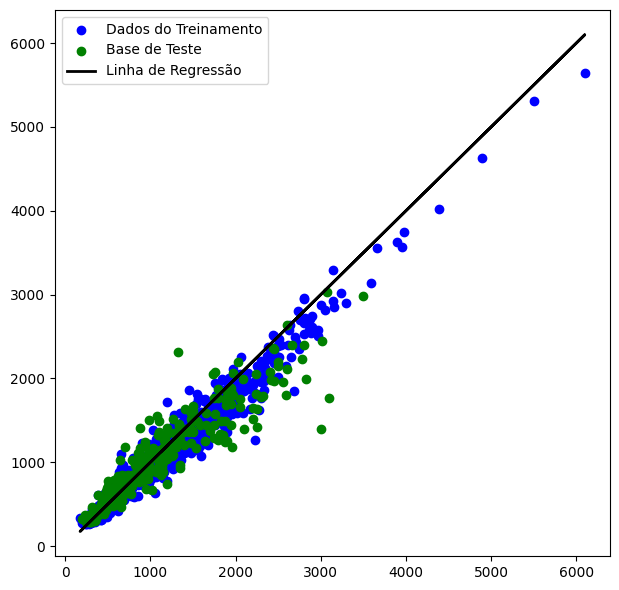

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_pred_train, color='blue', label='Dados do Treinamento')
plt.scatter(y_test, y_pred_test, color='green', label='Base de Teste')
plt.plot(y_train, y_train, color='black', linewidth=2, label='Linha de Regressão')
plt.legend()

plt.tight_layout()
plt.show()